In [1]:
#Step 1 : Importing the necessary libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 


In [2]:
#Step 2 : loading the dataset

df=pd.read_csv('customer-churn.csv')

In [3]:
# Step 3 : Getting the feel for the dataset

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Displaying the shape of the dataset

df.shape

(7043, 21)

In [5]:
# Displaying the information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Statistical summary of the dataset

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# Step 3 : Checking for null values in the dataset

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

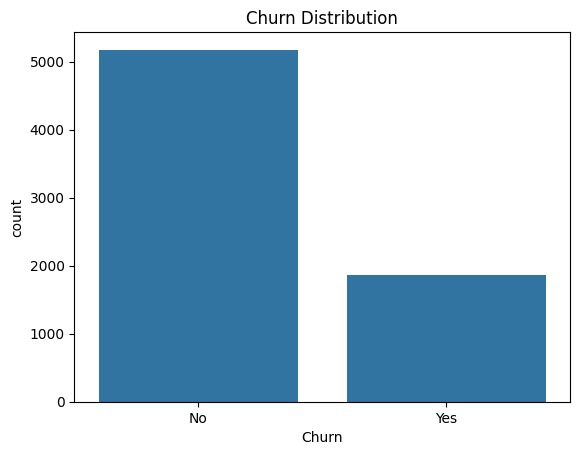

In [8]:
# Step 4 : Visualizing the dataset

import seaborn as sns

sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

In [9]:
# Convert 'TotalCharges' to a numeric type.

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isnull().sum()

11

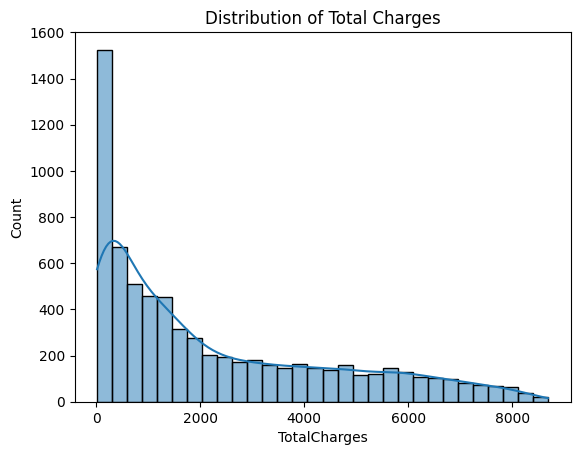

In [10]:
sns.histplot(df['TotalCharges'].dropna(), bins=30, kde=True)
plt.title('Distribution of Total Charges')
plt.show()

In [11]:
# Replace the missing values with the column's median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_32980\2715353644.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [12]:
df.isnull().sum()  # Check if there are still any missing values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
# Drop the customerID column

df.drop('customerID', axis=1, inplace=True)

In [14]:
# Step 5: Convert Categorical Features to Numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

In [15]:
# Step 6: One-Hot Encoding for Categorical Variables

# Create a list of all categorical columns (dtype='object')
categorical_cols = df.select_dtypes(include=['object']).columns

# Applying one-hot encoding
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [16]:
# Step 7 : Scaling Numerical Features

from sklearn.preprocessing import StandardScaler

# Identify the numerical columns to scale
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Apply the scaler
scaler = StandardScaler()
df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])

In [17]:
df_processed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.994242,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,0.066327,-0.259629,-0.173244,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,-1.236724,-0.362660,-0.959674,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,0.514251,-0.746535,-0.194766,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,-1.236724,0.197365,-0.940470,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [18]:
# Step 8 : Splitting the Data into Features and Target Variable

X = df_processed.drop('Churn', axis=1)  # Features
y = df_processed['Churn']  # Target variable

In [19]:
# Step 9 : Splitting the Data into Training and Testing Sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [26]:
# Step 10 : Model Training and Evaluation

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a Logistic Regression model
model = LogisticRegression(random_state=1)

model.fit(X_train, y_train)  
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8126330731014905


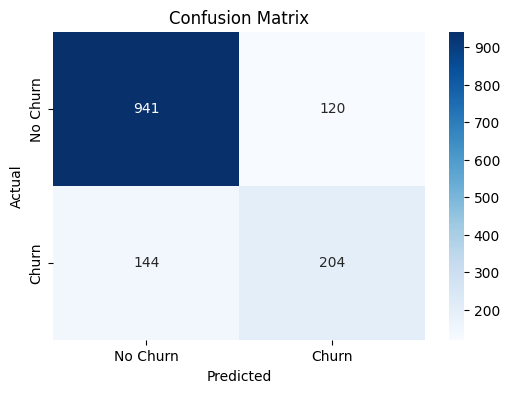


Classification Report:
              precision    recall  f1-score   support

    No Churn       0.87      0.89      0.88      1061
       Churn       0.63      0.59      0.61       348

    accuracy                           0.81      1409
   macro avg       0.75      0.74      0.74      1409
weighted avg       0.81      0.81      0.81      1409



In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Generate the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

--- Decision Tree Model Evaluation ---


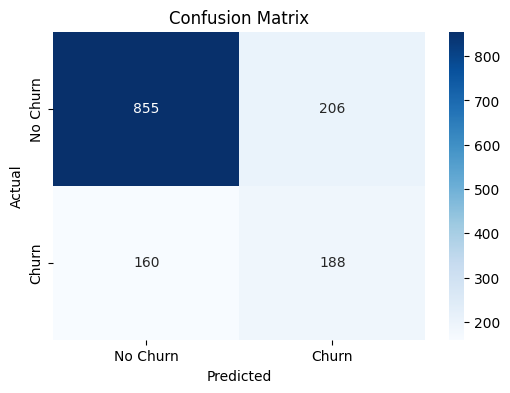


Classification Report:
              precision    recall  f1-score   support

    No Churn       0.84      0.81      0.82      1061
       Churn       0.48      0.54      0.51       348

    accuracy                           0.74      1409
   macro avg       0.66      0.67      0.67      1409
weighted avg       0.75      0.74      0.75      1409



In [28]:
# Using Decision Tree Classifier for comparison
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("--- Decision Tree Model Evaluation ---")

d_cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(d_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['No Churn', 'Churn']))

--- Random Forest Model Evaluation ---


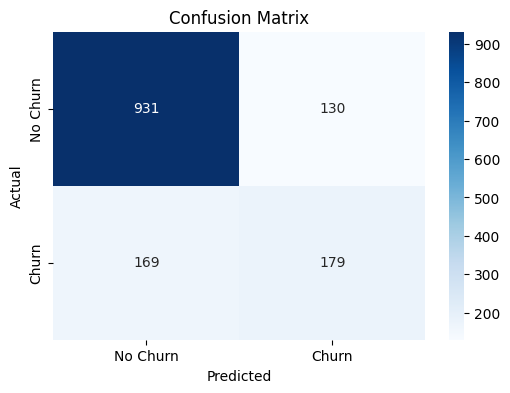


Classification Report:
              precision    recall  f1-score   support

    No Churn       0.85      0.88      0.86      1061
       Churn       0.58      0.51      0.54       348

    accuracy                           0.79      1409
   macro avg       0.71      0.70      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [23]:
# Step 11: Using more advanced models like Random Forest or XGBoost can further improve accuracy.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=40, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("--- Random Forest Model Evaluation ---")

r_cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(r_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['No Churn', 'Churn']))

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}

--- Tuned Random Forest Model Evaluation ---


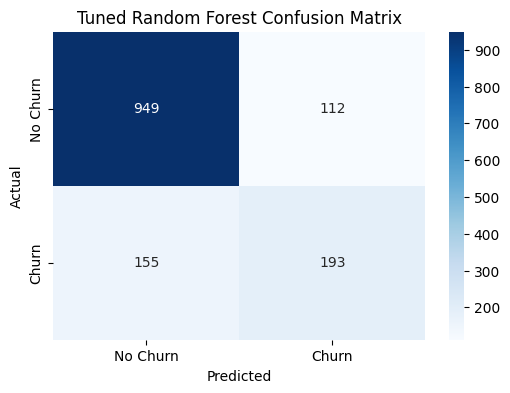


Classification Report:
              precision    recall  f1-score   support

    No Churn       0.86      0.89      0.88      1061
       Churn       0.63      0.55      0.59       348

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.81      0.81      1409

Accuracy of Tuned Random Forest: 0.8105039034776437


In [31]:

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator to make predictions
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the improved model
print("\n--- Tuned Random Forest Model Evaluation ---")
best_rf_cm = confusion_matrix(y_test, y_pred_best_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(best_rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Tuned Random Forest Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_rf, target_names=['No Churn', 'Churn']))
print ("Accuracy of Tuned Random Forest:", accuracy_score(y_test, y_pred_best_rf))


--- SVM Model Evaluation ---


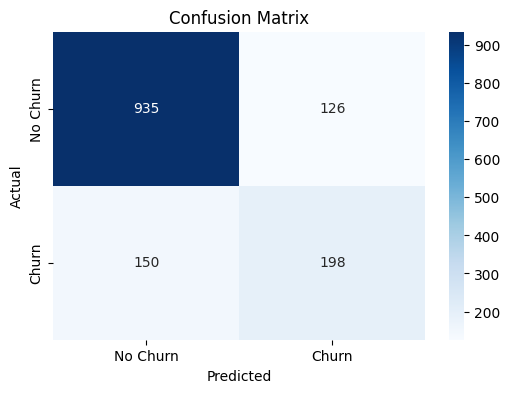


Classification Report:
              precision    recall  f1-score   support

    No Churn       0.86      0.88      0.87      1061
       Churn       0.61      0.57      0.59       348

    accuracy                           0.80      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.80      0.80      0.80      1409

Accuracy of SVM: 0.8041163946061036


In [35]:
# Lets try some other classification models like SVM or XGBoost

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("--- SVM Model Evaluation ---")

s_cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(s_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=['No Churn', 'Churn']))
print ("Accuracy of SVM:", accuracy_score(y_test, y_pred_svm))

--- XGBoost Model Evaluation ---


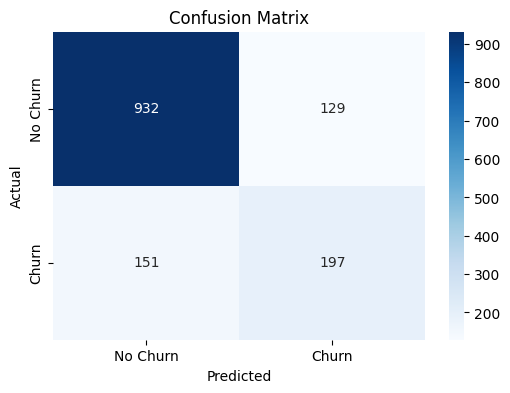


Classification Report:
              precision    recall  f1-score   support

    No Churn       0.86      0.88      0.87      1061
       Churn       0.60      0.57      0.58       348

    accuracy                           0.80      1409
   macro avg       0.73      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409

Accuracy of XGBoost: 0.801277501774308


In [37]:
# now lets try XGBoost
from xgboost import XGBClassifier   

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("--- XGBoost Model Evaluation ---")

x_cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(x_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['No Churn', 'Churn']))
print ("Accuracy of XGBoost:", accuracy_score(y_test, y_pred_xgb))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

--- Tuned XGBoost Model Evaluation ---


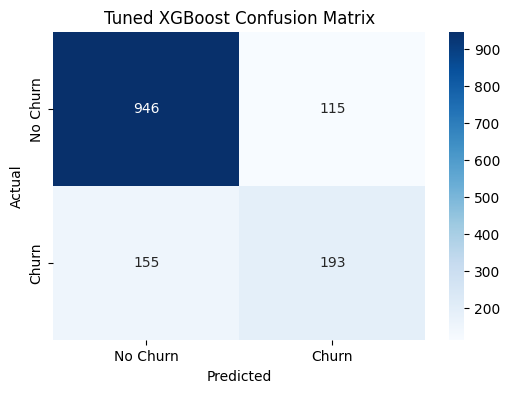


Classification Report:
              precision    recall  f1-score   support

    No Churn       0.86      0.89      0.88      1061
       Churn       0.63      0.55      0.59       348

    accuracy                           0.81      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

Accuracy of Tuned XGBoost: 0.808374733853797


In [38]:
# lets apply gridsearchcv to XGBoost as well
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

# Create a XGBoost classifier
xgb = XGBClassifier()

# Instantiate the grid search model
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search_xgb.best_params_)

# Use the best estimator to make predictions
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Evaluate the improved model
print("\n--- Tuned XGBoost Model Evaluation ---")
best_xgb_cm = confusion_matrix(y_test, y_pred_best_xgb)

plt.figure(figsize=(6, 4))
sns.heatmap(best_xgb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Tuned XGBoost Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_xgb, target_names=['No Churn', 'Churn']))
print ("Accuracy of Tuned XGBoost:", accuracy_score(y_test, y_pred_best_xgb))

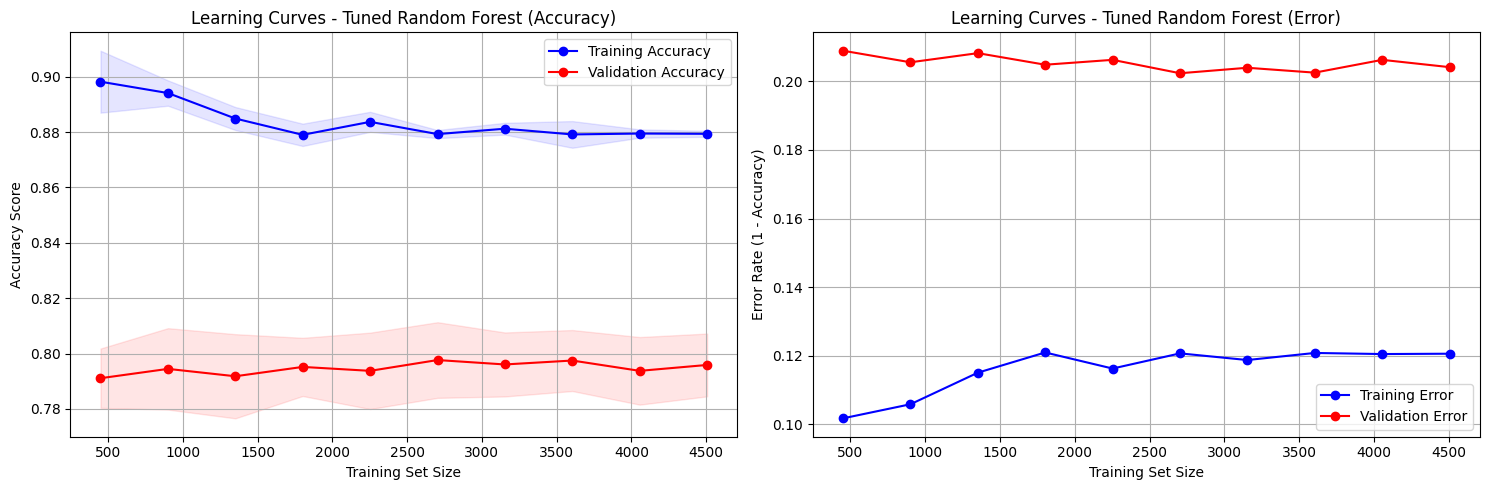

Final Training Accuracy: 0.8794 (+/- 0.0011)
Final Validation Accuracy: 0.7959 (+/- 0.0113)
Accuracy Gap (Training - Validation): 0.0835


In [39]:
# Learning Curves for Tuned Random Forest Model
from sklearn.model_selection import learning_curve
import numpy as np

# Generate learning curves for the tuned Random Forest
train_sizes, train_scores_rf, val_scores_rf = learning_curve(
    best_rf_model, X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Calculate mean and standard deviation
train_mean_rf = np.mean(train_scores_rf, axis=1)
train_std_rf = np.std(train_scores_rf, axis=1)
val_mean_rf = np.mean(val_scores_rf, axis=1)
val_std_rf = np.std(val_scores_rf, axis=1)

# Plot learning curves for Random Forest
plt.figure(figsize=(15, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(train_sizes, train_mean_rf, 'o-', color='blue', label='Training Accuracy')
plt.plot(train_sizes, val_mean_rf, 'o-', color='red', label='Validation Accuracy')
plt.fill_between(train_sizes, train_mean_rf - train_std_rf, train_mean_rf + train_std_rf, alpha=0.1, color='blue')
plt.fill_between(train_sizes, val_mean_rf - val_std_rf, val_mean_rf + val_std_rf, alpha=0.1, color='red')
plt.title('Learning Curves - Tuned Random Forest (Accuracy)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid(True)

# Error plot
plt.subplot(1, 2, 2)
plt.plot(train_sizes, 1 - train_mean_rf, 'o-', color='blue', label='Training Error')
plt.plot(train_sizes, 1 - val_mean_rf, 'o-', color='red', label='Validation Error')
plt.title('Learning Curves - Tuned Random Forest (Error)')
plt.xlabel('Training Set Size')
plt.ylabel('Error Rate (1 - Accuracy)')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Final Training Accuracy: {train_mean_rf[-1]:.4f} (+/- {train_std_rf[-1]:.4f})")
print(f"Final Validation Accuracy: {val_mean_rf[-1]:.4f} (+/- {val_std_rf[-1]:.4f})")
print(f"Accuracy Gap (Training - Validation): {train_mean_rf[-1] - val_mean_rf[-1]:.4f}")


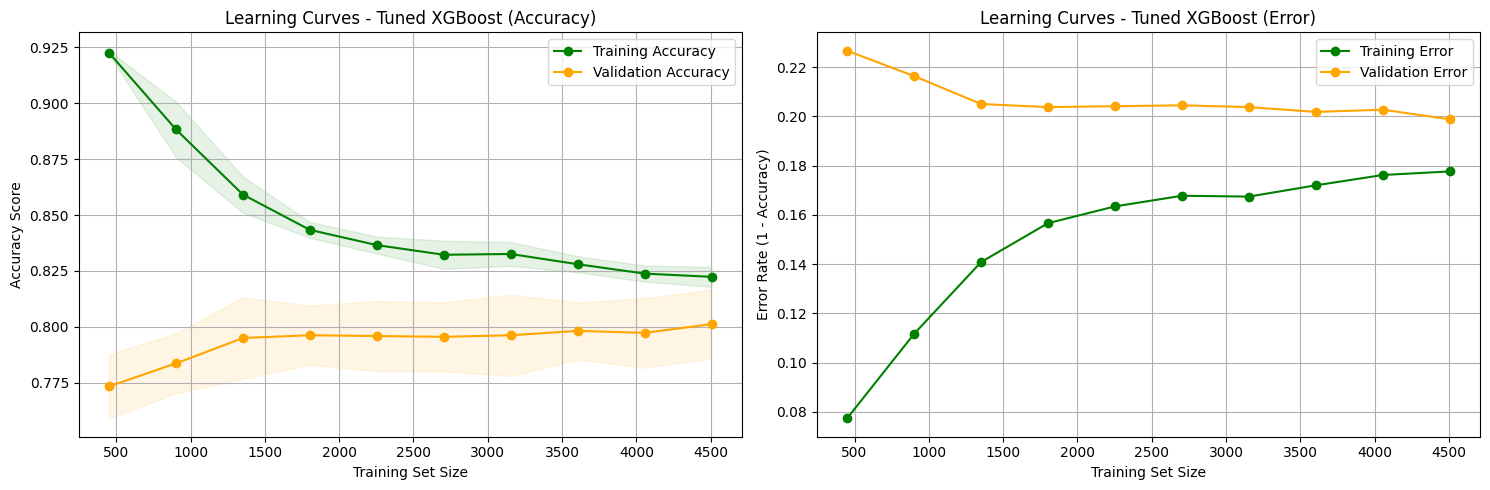

Final Training Accuracy: 0.8224 (+/- 0.0045)
Final Validation Accuracy: 0.8012 (+/- 0.0154)
Accuracy Gap (Training - Validation): 0.0212


In [40]:
# Learning Curves for Tuned XGBoost Model
train_sizes, train_scores_xgb, val_scores_xgb = learning_curve(
    best_xgb_model, X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Calculate mean and standard deviation
train_mean_xgb = np.mean(train_scores_xgb, axis=1)
train_std_xgb = np.std(train_scores_xgb, axis=1)
val_mean_xgb = np.mean(val_scores_xgb, axis=1)
val_std_xgb = np.std(val_scores_xgb, axis=1)

# Plot learning curves for XGBoost
plt.figure(figsize=(15, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(train_sizes, train_mean_xgb, 'o-', color='green', label='Training Accuracy')
plt.plot(train_sizes, val_mean_xgb, 'o-', color='orange', label='Validation Accuracy')
plt.fill_between(train_sizes, train_mean_xgb - train_std_xgb, train_mean_xgb + train_std_xgb, alpha=0.1, color='green')
plt.fill_between(train_sizes, val_mean_xgb - val_std_xgb, val_mean_xgb + val_std_xgb, alpha=0.1, color='orange')
plt.title('Learning Curves - Tuned XGBoost (Accuracy)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid(True)

# Error plot
plt.subplot(1, 2, 2)
plt.plot(train_sizes, 1 - train_mean_xgb, 'o-', color='green', label='Training Error')
plt.plot(train_sizes, 1 - val_mean_xgb, 'o-', color='orange', label='Validation Error')
plt.title('Learning Curves - Tuned XGBoost (Error)')
plt.xlabel('Training Set Size')
plt.ylabel('Error Rate (1 - Accuracy)')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Final Training Accuracy: {train_mean_xgb[-1]:.4f} (+/- {train_std_xgb[-1]:.4f})")
print(f"Final Validation Accuracy: {val_mean_xgb[-1]:.4f} (+/- {val_std_xgb[-1]:.4f})")
print(f"Accuracy Gap (Training - Validation): {train_mean_xgb[-1] - val_mean_xgb[-1]:.4f}")


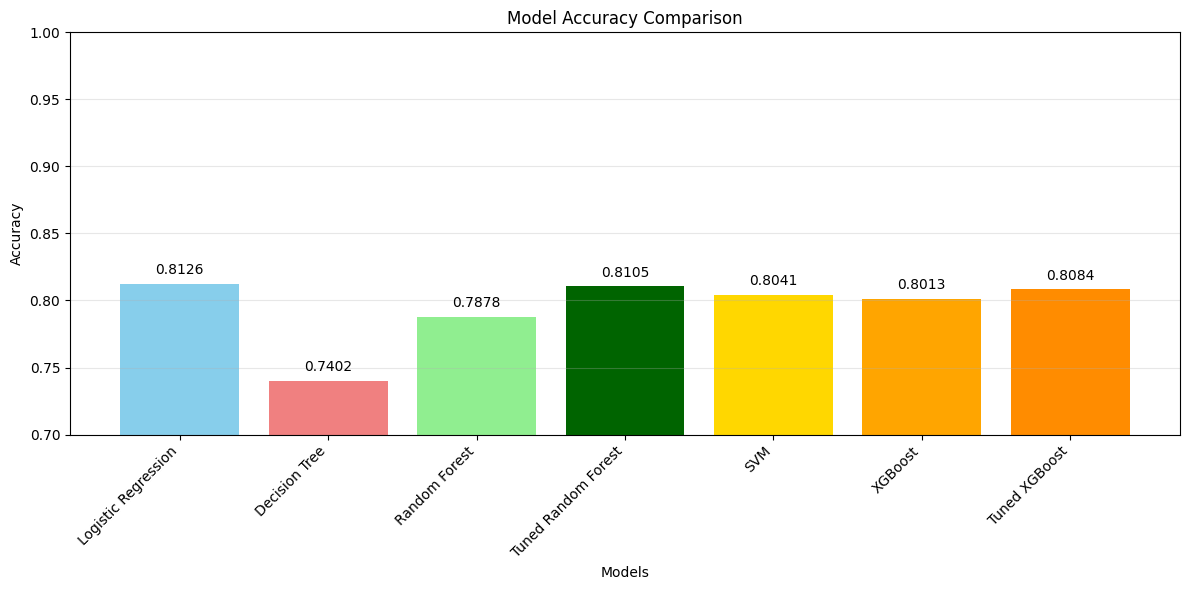

Model Performance Summary:
----------------------------------------
Logistic Regression : 0.8126
Decision Tree       : 0.7402
Random Forest       : 0.7878
Tuned Random Forest : 0.8105
SVM                 : 0.8041
XGBoost             : 0.8013
Tuned XGBoost       : 0.8084


In [41]:
# Model Comparison Visualization
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Tuned Random Forest', 
          'SVM', 'XGBoost', 'Tuned XGBoost']
accuracies = [
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_best_rf),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_xgb),
    accuracy_score(y_test, y_pred_best_xgb)
]

# Create a bar plot comparing all models
plt.figure(figsize=(12, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'darkgreen', 
                                          'gold', 'orange', 'darkorange'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.7, 1.0)

# Add accuracy values on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{accuracies[i]:.4f}', ha='center', va='bottom')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary
print("Model Performance Summary:")
print("-" * 40)
for model, acc in zip(models, accuracies):
    print(f"{model:<20}: {acc:.4f}")


# ### Step 14: Feature Selection

# Feature selection helps improve model performance by:
# - **Reducing overfitting** by removing irrelevant features
# - **Improving accuracy** by focusing on the most important features
# - **Reducing training time** by working with fewer dimensions
# - **Making models more interpretable**

# We'll explore several feature selection techniques:
# 1. **Correlation Analysis** - Remove highly correlated features
# 2. **Univariate Selection** - Statistical tests to select best features
# 3. **Recursive Feature Elimination (RFE)** - Recursively eliminate features
# 4. **Feature Importance from Tree-based models** - Use Random Forest feature importance
# 5. **SelectFromModel** - Select features based on importance weights

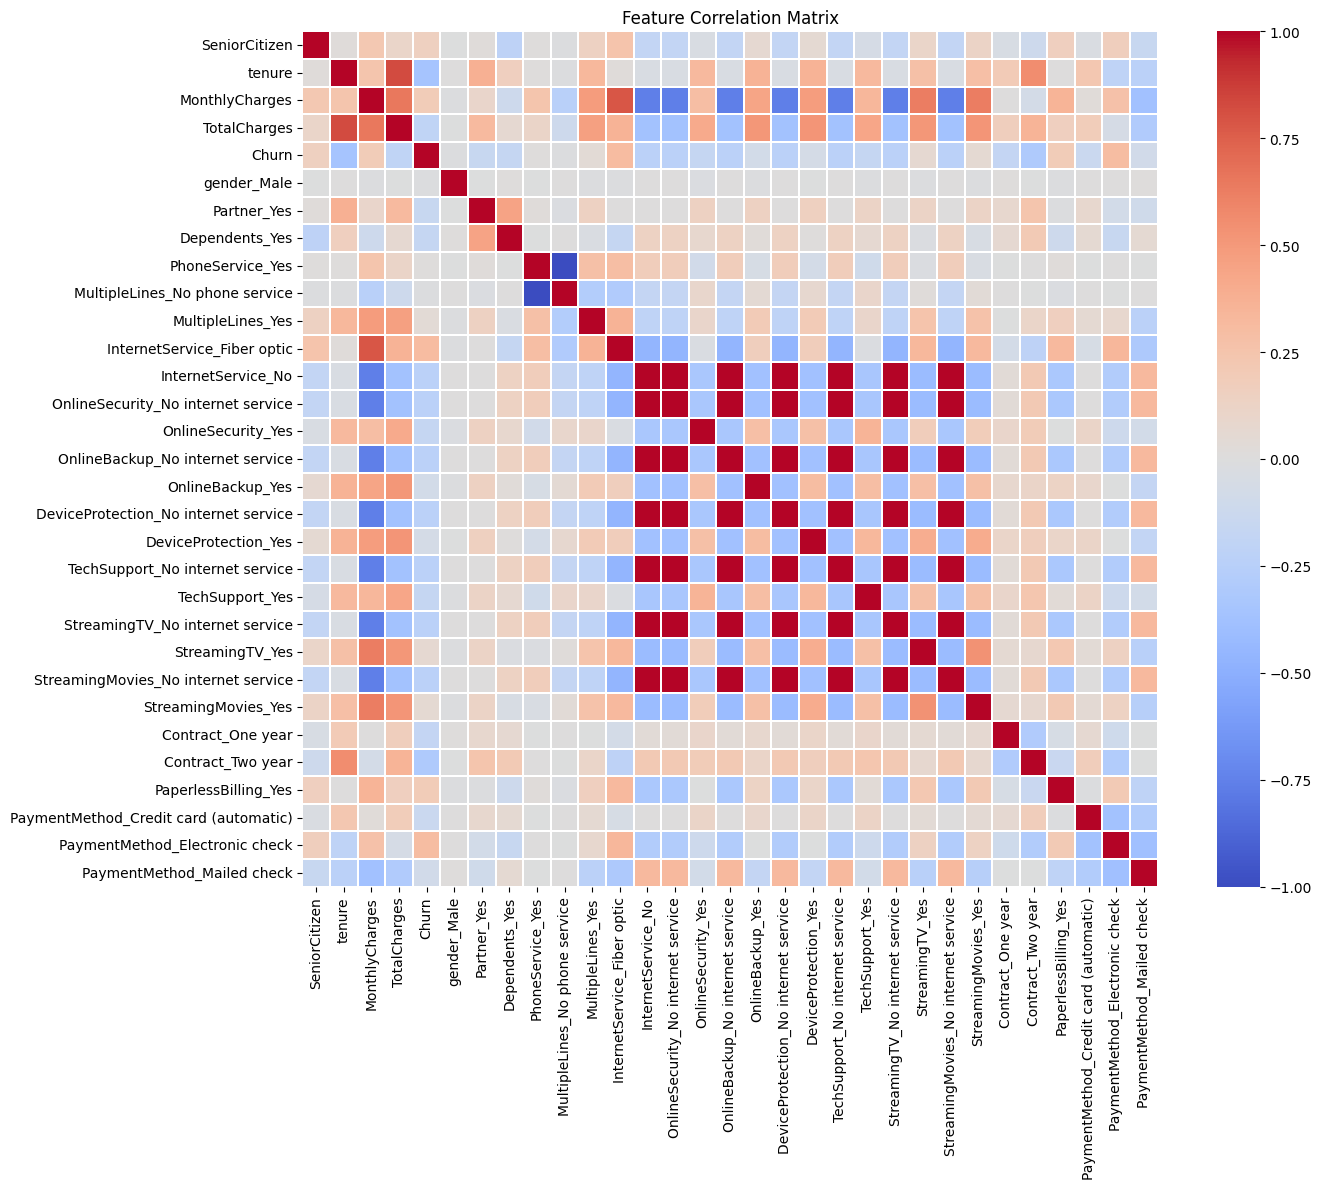

Highly correlated feature pairs (correlation > 0.8):
tenure - TotalCharges: 0.825
PhoneService_Yes - MultipleLines_No phone service: -1.000
InternetService_No - OnlineSecurity_No internet service: 1.000
InternetService_No - OnlineBackup_No internet service: 1.000
InternetService_No - DeviceProtection_No internet service: 1.000
InternetService_No - TechSupport_No internet service: 1.000
InternetService_No - StreamingTV_No internet service: 1.000
InternetService_No - StreamingMovies_No internet service: 1.000
OnlineSecurity_No internet service - OnlineBackup_No internet service: 1.000
OnlineSecurity_No internet service - DeviceProtection_No internet service: 1.000
OnlineSecurity_No internet service - TechSupport_No internet service: 1.000
OnlineSecurity_No internet service - StreamingTV_No internet service: 1.000
OnlineSecurity_No internet service - StreamingMovies_No internet service: 1.000
OnlineBackup_No internet service - DeviceProtection_No internet service: 1.000
OnlineBackup_No in

In [42]:
# 1. Correlation Analysis - Remove highly correlated features
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create correlation matrix
correlation_matrix = df_processed.corr()

# Plot correlation heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.1)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Find pairs of highly correlated features (threshold > 0.8)
def find_correlated_features(corr_matrix, threshold=0.8):
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append((
                    corr_matrix.columns[i], 
                    corr_matrix.columns[j], 
                    corr_matrix.iloc[i, j]
                ))
    return high_corr_pairs

high_corr_features = find_correlated_features(correlation_matrix, 0.8)
print("Highly correlated feature pairs (correlation > 0.8):")
for feature1, feature2, corr in high_corr_features:
    print(f"{feature1} - {feature2}: {corr:.3f}")

# Remove one feature from each highly correlated pair
features_to_remove = []
for feature1, feature2, corr in high_corr_features:
    if feature1 not in features_to_remove and feature2 not in features_to_remove:
        features_to_remove.append(feature2)  # Remove the second feature

print(f"\nFeatures to remove due to high correlation: {features_to_remove}")
print(f"Original number of features: {X.shape[1]}")

# Create dataset without highly correlated features
X_corr_filtered = X.drop(columns=features_to_remove, errors='ignore')
print(f"Features after correlation filtering: {X_corr_filtered.shape[1]}")


Top 15 features selected by Chi-square test:
['SeniorCitizen', 'tenure', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingMovies_No internet service', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Electronic check']

Top 15 features selected by F-score test:
['tenure', 'MonthlyCharges', 'TotalCharges', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']


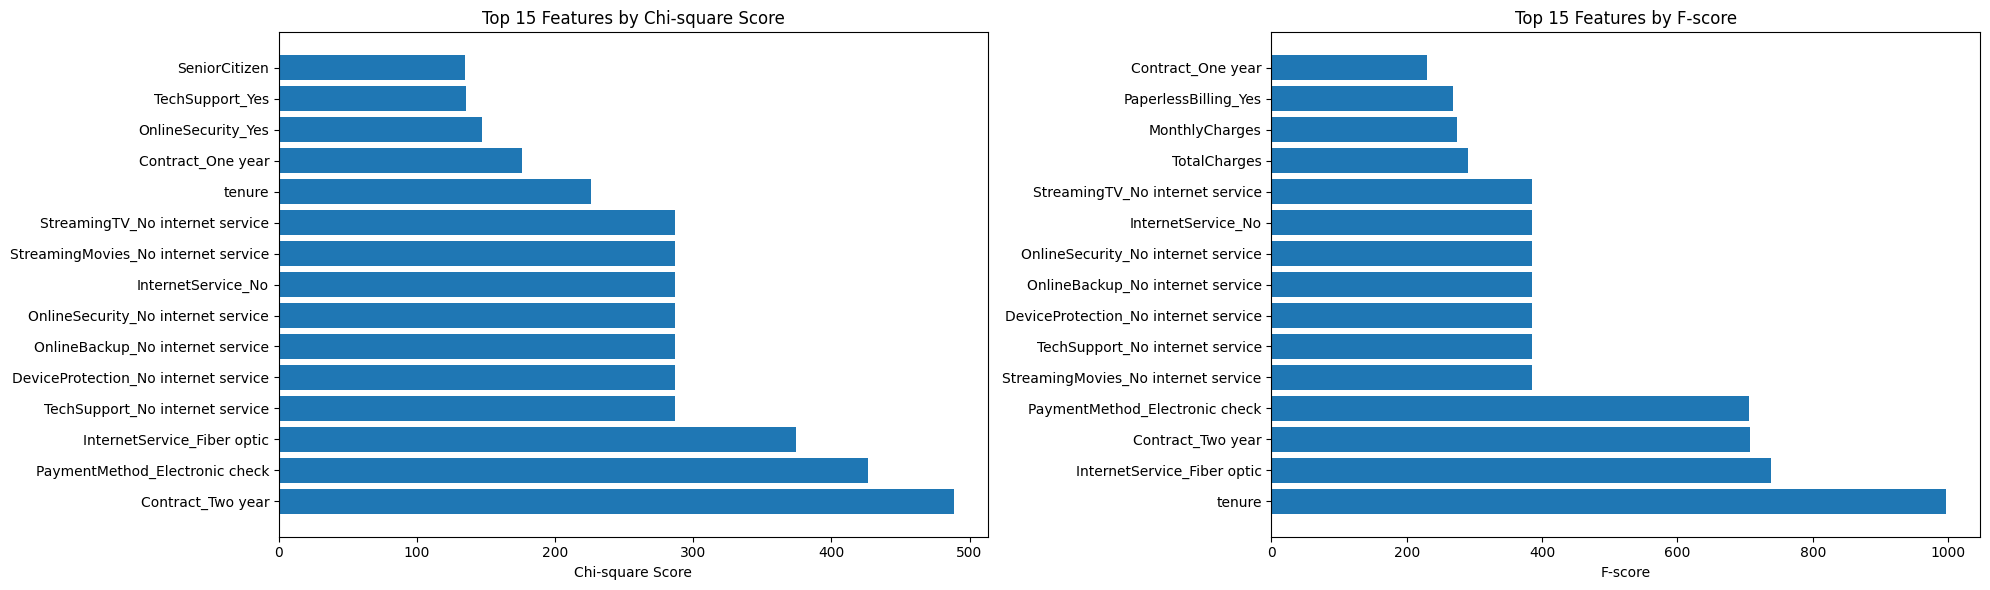

In [43]:
# 2. Univariate Feature Selection using Chi-square and F-score
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import MinMaxScaler

# For chi-square test, we need non-negative features
scaler_positive = MinMaxScaler()
X_positive = scaler_positive.fit_transform(X)

# Chi-square test (for categorical features)
chi2_selector = SelectKBest(chi2, k=15)  # Select top 15 features
X_chi2 = chi2_selector.fit_transform(X_positive, y)
chi2_selected_features = X.columns[chi2_selector.get_support()].tolist()

# F-score test (for numerical features)
f_selector = SelectKBest(f_classif, k=15)  # Select top 15 features
X_f_score = f_selector.fit_transform(X, y)
f_score_selected_features = X.columns[f_selector.get_support()].tolist()

print("Top 15 features selected by Chi-square test:")
print(chi2_selected_features)
print(f"\nTop 15 features selected by F-score test:")
print(f_score_selected_features)

# Get feature scores for visualization
chi2_scores = chi2_selector.scores_
f_scores = f_selector.scores_

# Plot feature scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Chi-square scores
feature_chi2_df = pd.DataFrame({
    'Feature': X.columns,
    'Chi2_Score': chi2_scores
}).sort_values('Chi2_Score', ascending=False)

ax1.barh(range(len(feature_chi2_df.head(15))), feature_chi2_df.head(15)['Chi2_Score'])
ax1.set_yticks(range(len(feature_chi2_df.head(15))))
ax1.set_yticklabels(feature_chi2_df.head(15)['Feature'])
ax1.set_title('Top 15 Features by Chi-square Score')
ax1.set_xlabel('Chi-square Score')

# F-score scores
feature_f_df = pd.DataFrame({
    'Feature': X.columns,
    'F_Score': f_scores
}).sort_values('F_Score', ascending=False)

ax2.barh(range(len(feature_f_df.head(15))), feature_f_df.head(15)['F_Score'])
ax2.set_yticks(range(len(feature_f_df.head(15))))
ax2.set_yticklabels(feature_f_df.head(15)['Feature'])
ax2.set_title('Top 15 Features by F-score')
ax2.set_xlabel('F-score')

plt.tight_layout()
plt.show()


Top 15 features selected by RFE:
['tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'OnlineSecurity_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']

Feature Rankings (1 = most important):
                                Feature  Ranking  Selected
10          InternetService_Fiber optic        1      True
18      TechSupport_No internet service        1      True
21                      StreamingTV_Yes        1      True
22  StreamingMovies_No internet service        1      True
28       PaymentMethod_Electronic check        1      True
12   OnlineSecurity_No internet service        1      True
9                     MultipleLines_Yes        1      True
20      StreamingTV_No internet service        1      True
24        

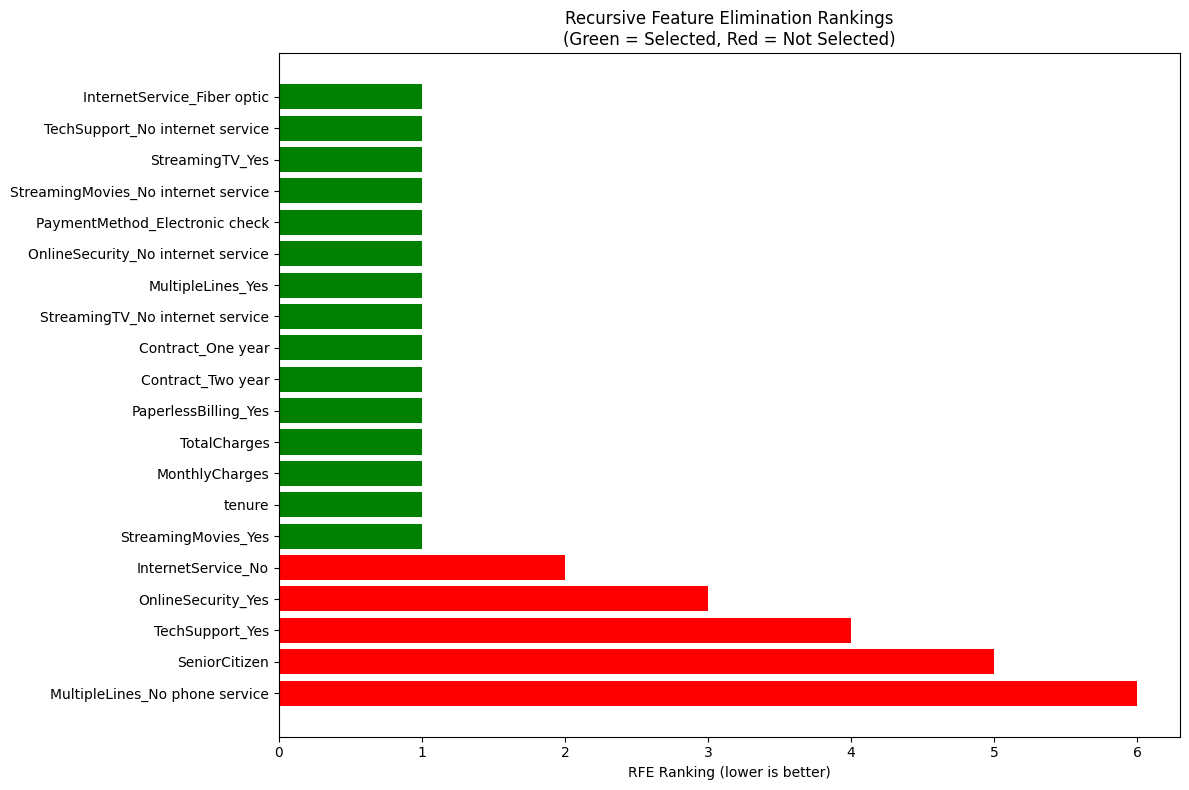

In [44]:
# 3. Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Use logistic regression as the estimator for RFE
lr_estimator = LogisticRegression(random_state=42, max_iter=1000)
rfe_selector = RFE(estimator=lr_estimator, n_features_to_select=15, step=1)
rfe_selector.fit(X, y)

# Get selected features
rfe_selected_features = X.columns[rfe_selector.support_].tolist()
rfe_feature_ranking = rfe_selector.ranking_

print("Top 15 features selected by RFE:")
print(rfe_selected_features)

# Create a dataframe with feature rankings
rfe_ranking_df = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe_feature_ranking,
    'Selected': rfe_selector.support_
}).sort_values('Ranking')

print(f"\nFeature Rankings (1 = most important):")
print(rfe_ranking_df.head(20))

# Visualize feature rankings
plt.figure(figsize=(12, 8))
colors = ['green' if selected else 'red' for selected in rfe_ranking_df.head(20)['Selected']]
plt.barh(range(20), rfe_ranking_df.head(20)['Ranking'], color=colors)
plt.yticks(range(20), rfe_ranking_df.head(20)['Feature'])
plt.xlabel('RFE Ranking (lower is better)')
plt.title('Recursive Feature Elimination Rankings\n(Green = Selected, Red = Not Selected)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Top 15 features by Random Forest importance:
['TotalCharges', 'tenure', 'MonthlyCharges', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check', 'Contract_Two year', 'gender_Male', 'OnlineSecurity_Yes', 'PaperlessBilling_Yes', 'TechSupport_Yes', 'Partner_Yes', 'Contract_One year', 'OnlineBackup_Yes', 'SeniorCitizen', 'MultipleLines_Yes']


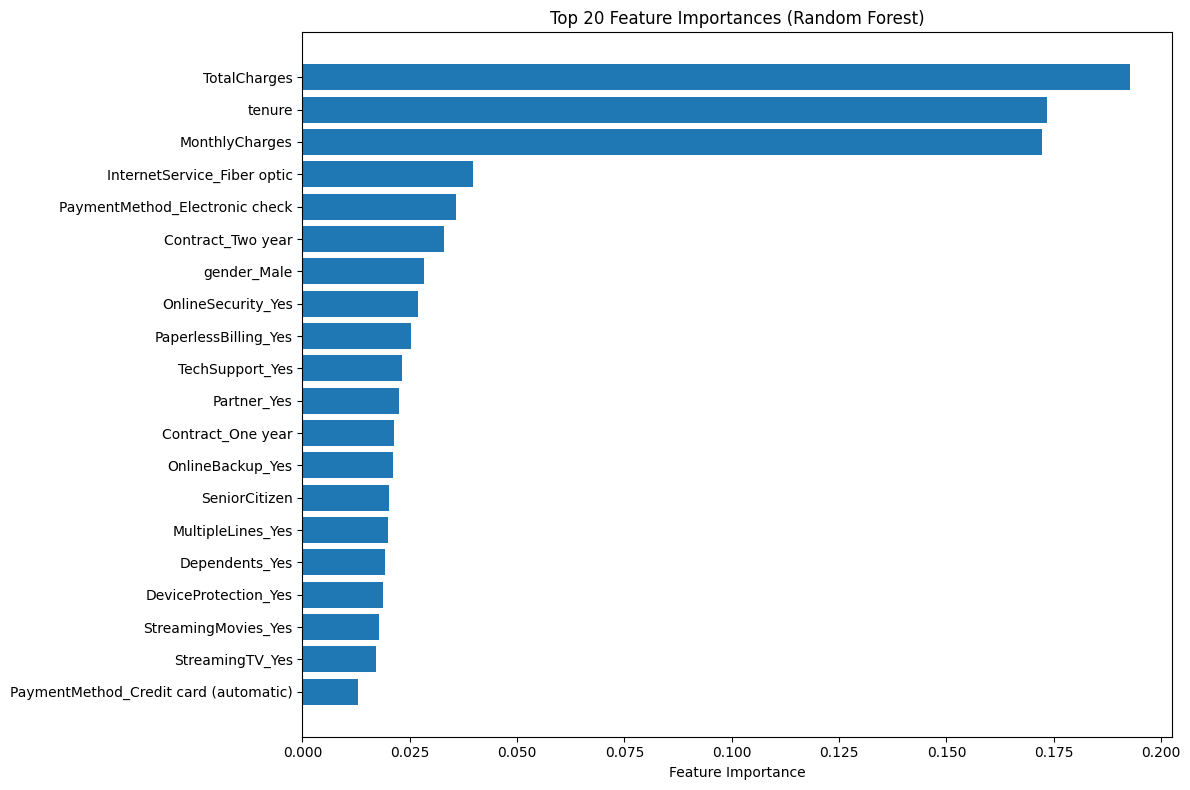


Top 20 Feature Importances:
                                  Feature  Importance
3                            TotalCharges    0.192846
1                                  tenure    0.173395
2                          MonthlyCharges    0.172255
10            InternetService_Fiber optic    0.039823
28         PaymentMethod_Electronic check    0.035774
25                      Contract_Two year    0.032939
4                             gender_Male    0.028368
13                     OnlineSecurity_Yes    0.026899
26                   PaperlessBilling_Yes    0.025229
19                        TechSupport_Yes    0.023075
5                             Partner_Yes    0.022499
24                      Contract_One year    0.021381
15                       OnlineBackup_Yes    0.021092
0                           SeniorCitizen    0.020138
9                       MultipleLines_Yes    0.019965
6                          Dependents_Yes    0.019188
17                   DeviceProtection_Yes    0.018776

In [45]:
# 4. Feature Importance using Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest to get feature importances
rf_importance = RandomForestClassifier(n_estimators=100, random_state=42)
rf_importance.fit(X, y)

# Get feature importances
feature_importances = rf_importance.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

# Select top 15 features based on importance
rf_selected_features = importance_df.head(15)['Feature'].tolist()

print("Top 15 features by Random Forest importance:")
print(rf_selected_features)

# Visualize feature importances
plt.figure(figsize=(12, 8))
plt.barh(range(20), importance_df.head(20)['Importance'])
plt.yticks(range(20), importance_df.head(20)['Feature'])
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importances (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"\nTop 20 Feature Importances:")
print(importance_df.head(20))


Feature Selection Methods Comparison:
Chi-square selected features (15): ['SeniorCitizen', 'tenure', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingMovies_No internet service', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Electronic check']
F-score selected features (15): ['tenure', 'MonthlyCharges', 'TotalCharges', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']
RFE selected features (15): ['tenure', 'MonthlyCharge

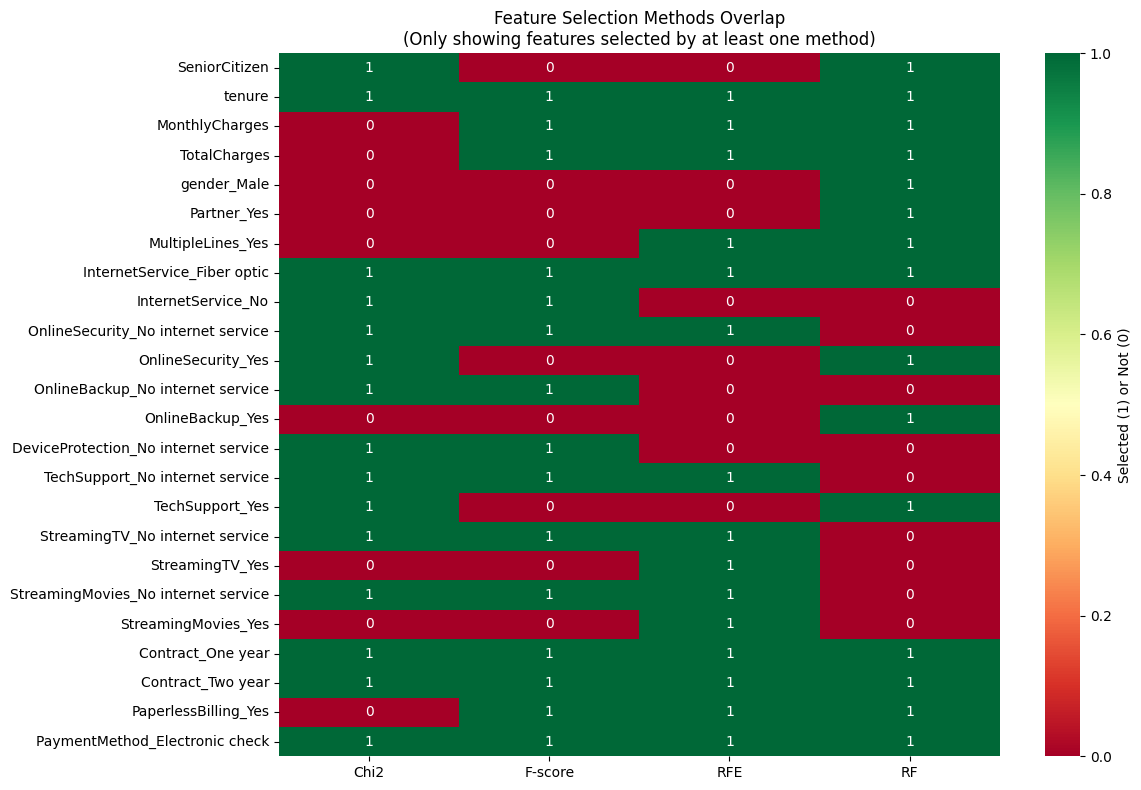

In [46]:
# 5. Compare all feature selection methods
print("Feature Selection Methods Comparison:")
print("="*50)
print(f"Chi-square selected features ({len(chi2_selected_features)}): {chi2_selected_features}")
print(f"F-score selected features ({len(f_score_selected_features)}): {f_score_selected_features}")
print(f"RFE selected features ({len(rfe_selected_features)}): {rfe_selected_features}")
print(f"Random Forest selected features ({len(rf_selected_features)}): {rf_selected_features}")

# Find features that appear in multiple selection methods (consensus features)
all_selected_features = [
    set(chi2_selected_features),
    set(f_score_selected_features), 
    set(rfe_selected_features),
    set(rf_selected_features)
]

# Features selected by at least 3 methods
consensus_features_3 = set.intersection(*[s for s in all_selected_features[:3]])
for method_features in all_selected_features[3:]:
    consensus_features_3 = consensus_features_3.union(
        set.intersection(consensus_features_3, method_features)
    )

# Features selected by at least 2 methods
from collections import Counter
all_features_list = chi2_selected_features + f_score_selected_features + rfe_selected_features + rf_selected_features
feature_counts = Counter(all_features_list)
consensus_features_2 = [feature for feature, count in feature_counts.items() if count >= 2]

print(f"\nConsensus features (selected by at least 2 methods): {len(consensus_features_2)}")
print(consensus_features_2)

# Create a visualization of feature selection overlap
methods = ['Chi2', 'F-score', 'RFE', 'RF']
feature_selection_matrix = pd.DataFrame(index=X.columns, columns=methods)

feature_selection_matrix['Chi2'] = X.columns.isin(chi2_selected_features)
feature_selection_matrix['F-score'] = X.columns.isin(f_score_selected_features)
feature_selection_matrix['RFE'] = X.columns.isin(rfe_selected_features)
feature_selection_matrix['RF'] = X.columns.isin(rf_selected_features)

# Count how many methods selected each feature
feature_selection_matrix['Count'] = feature_selection_matrix.sum(axis=1)

# Show features selected by multiple methods
print(f"\nFeatures and selection count:")
selected_by_multiple = feature_selection_matrix[feature_selection_matrix['Count'] >= 2].sort_values('Count', ascending=False)
print(selected_by_multiple)

# Visualize the overlap
plt.figure(figsize=(12, 8))
sns.heatmap(feature_selection_matrix[feature_selection_matrix['Count'] >= 1][methods].astype(int), 
            annot=True, cmap='RdYlGn', cbar_kws={'label': 'Selected (1) or Not (0)'})
plt.title('Feature Selection Methods Overlap\n(Only showing features selected by at least one method)')
plt.tight_layout()
plt.show()


All Features:
  Number of features: 30
  Accuracy: 0.7956

Consensus (2+ methods):
  Number of features: 19
  Accuracy: 0.8070

Chi-square Top 15:
  Number of features: 15
  Accuracy: 0.7537

F-score Top 15:
  Number of features: 15
  Accuracy: 0.7913

RFE Top 15:
  Number of features: 15
  Accuracy: 0.7899

Random Forest Top 15:
  Number of features: 15
  Accuracy: 0.7991

Correlation Filtered:
  Number of features: 22
  Accuracy: 0.7991



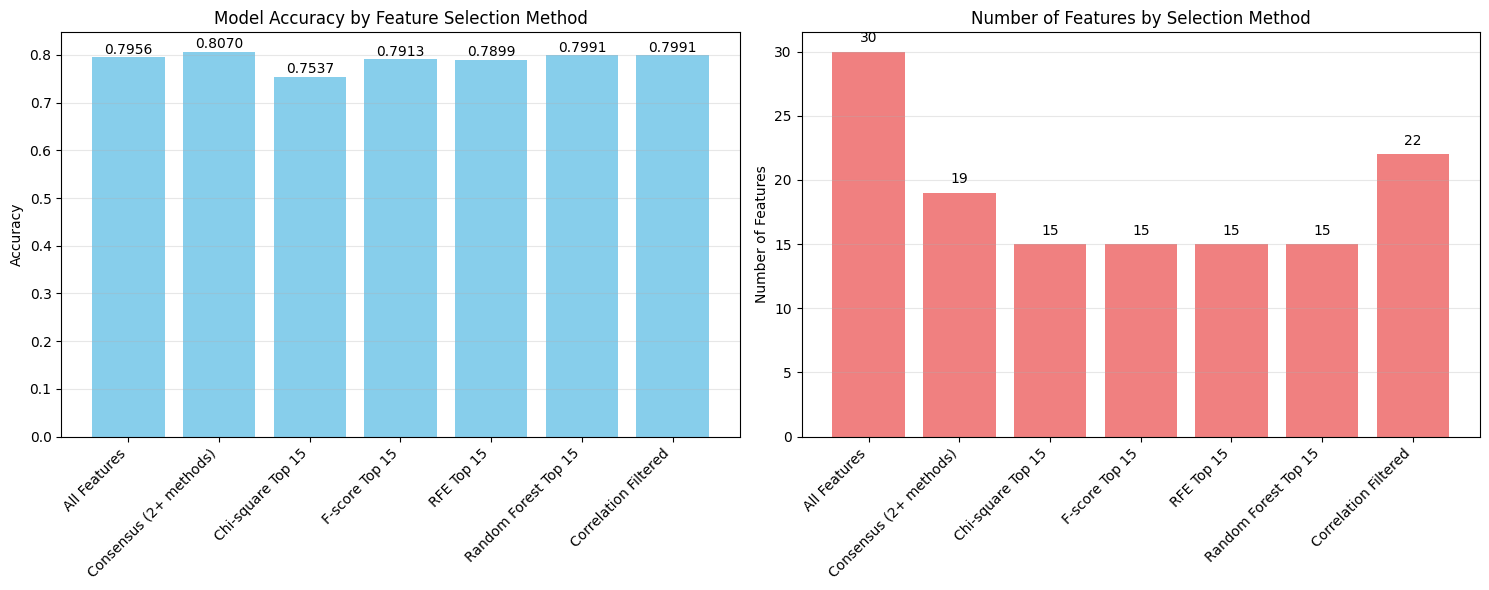

Best performing feature selection method: Consensus (2+ methods)
Accuracy: 0.8070
Number of features: 19


In [47]:
# 6. Evaluate model performance with different feature selections
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create datasets with different feature selections
datasets = {
    'All Features': X,
    'Consensus (2+ methods)': X[consensus_features_2],
    'Chi-square Top 15': X[chi2_selected_features],
    'F-score Top 15': X[f_score_selected_features], 
    'RFE Top 15': X[rfe_selected_features],
    'Random Forest Top 15': X[rf_selected_features],
    'Correlation Filtered': X_corr_filtered
}

# Test each feature selection method
results = {}
for method_name, X_selected in datasets.items():
    # Split the data
    X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(
        X_selected, y, test_size=0.2, random_state=1
    )
    
    # Train Random Forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train_sel, y_train_sel)
    
    # Make predictions
    y_pred_sel = rf_model.predict(X_test_sel)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test_sel, y_pred_sel)
    results[method_name] = {
        'accuracy': accuracy,
        'n_features': X_selected.shape[1]
    }
    
    print(f"{method_name}:")
    print(f"  Number of features: {X_selected.shape[1]}")
    print(f"  Accuracy: {accuracy:.4f}")
    print()

# Create comparison visualization
methods = list(results.keys())
accuracies = [results[method]['accuracy'] for method in methods]
n_features = [results[method]['n_features'] for method in methods]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Accuracy comparison
bars1 = ax1.bar(range(len(methods)), accuracies, color='skyblue')
ax1.set_xticks(range(len(methods)))
ax1.set_xticklabels(methods, rotation=45, ha='right')
ax1.set_ylabel('Accuracy')
ax1.set_title('Model Accuracy by Feature Selection Method')
ax1.grid(axis='y', alpha=0.3)

# Add accuracy values on bars
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{accuracies[i]:.4f}', ha='center', va='bottom')

# Number of features comparison
bars2 = ax2.bar(range(len(methods)), n_features, color='lightcoral')
ax2.set_xticks(range(len(methods)))
ax2.set_xticklabels(methods, rotation=45, ha='right')
ax2.set_ylabel('Number of Features')
ax2.set_title('Number of Features by Selection Method')
ax2.grid(axis='y', alpha=0.3)

# Add feature count values on bars
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{n_features[i]}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Find the best performing method
best_method = max(results.keys(), key=lambda x: results[x]['accuracy'])
print(f"Best performing feature selection method: {best_method}")
print(f"Accuracy: {results[best_method]['accuracy']:.4f}")
print(f"Number of features: {results[best_method]['n_features']}")
